In [115]:
%load_ext lab_black

from puzzles import load

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [116]:
def print_line(state, number):
    n = f"{number: 2d}"
    s = "".join([".#"[i] for i in state])
    print(f"{n}: {s}")


def get_slice(state, i):
    if i == 0:
        s = np.concatenate([np.zeros(2, np.int32), state[i : i + 3]])
    elif i == 1:
        s = np.concatenate([np.zeros(1, np.int32), state[i - 1 : i + 3]])
    elif i == len(state) - 2:
        s = np.concatenate([state[i - 2 : i + 2], np.zeros(1, np.int32)])
    elif i == len(state) - 1:
        s = np.concatenate([state[i - 2 : i + 1], np.zeros(2, np.int32)])
    else:
        s = state[i - 2 : i + 3]
    return tuple(s)

In [117]:
lines = load(12).strip().split("\n")
# lines = """initial state: #..#.#..##......###...###

# ...## => #
# ..#.. => #
# .#... => #
# .#.#. => #
# .#.## => #
# .##.. => #
# .#### => #
# #.#.# => #
# #.### => #
# ##.#. => #
# ##.## => #
# ###.. => #
# ###.# => #
# ####. => #""".strip().split(
#     "\n"
# )

initial_state = np.array([".#".index(c) for c in lines[0].split(": ")[-1]])
rules = lines[2:]

producer = {}
for line in rules:
    given, produce = line.split(" => ")
    given = np.array([".#".index(c) for c in given])
    produce = ".#".index(produce)
    producer[tuple(given)] = produce

In [156]:
M = 1000
L = 1000

A = np.zeros([L + 1, M + len(state) + M], np.int32)
A[0, M : M + len(initial_state)] = initial_state

In [157]:
for line_i in range(1, L + 1):
    state = A[line_i - 1]
    for i in range(len(state)):
        A[line_i, i] = producer.get(get_slice(state, i), 0)

(np.where(A[L] == 1)[0] - M).sum()

42061

---

(1000.0, 995.0)

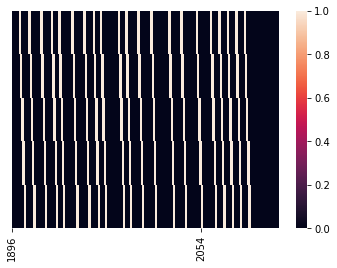

In [127]:
sns.heatmap(A)
plt.xlim(1896, 2120)
plt.ylim(1000, 995)

In [ ]:
for i in range(950, 999):
    v = np.where(A[i] == 1)[0] - M
    print(v[0], v[-1])

857 1046
858 1047
859 1048
860 1049
861 1050
862 1051
863 1052
864 1053
865 1054
866 1055
867 1056
868 1057
869 1058
870 1059
871 1060
872 1061
873 1062
874 1063
875 1064
876 1065
877 1066
878 1067
879 1068
880 1069
881 1070
882 1071
883 1072
884 1073
885 1074
886 1075
887 1076
888 1077
889 1078
890 1079
891 1080
892 1081
893 1082
894 1083
895 1084
896 1085
897 1086
898 1087
899 1088
900 1089
901 1090
902 1091
903 1092
904 1093
905 1094


In [145]:
t1 = tuple(
    [b - a for a, b in zip(np.where(A[990] == 1)[0], np.where(A[990] == 1)[0][1:])]
)

t2 = tuple(
    [b - a for a, b in zip(np.where(A[880] == 1)[0], np.where(A[880] == 1)[0][1:])]
)

t3 = tuple(
    [b - a for a, b in zip(np.where(A[931] == 1)[0], np.where(A[931] == 1)[0][1:])]
)

In [146]:
t1 == t2 == t3

True

In [166]:
def f(x):
    x0 = x + (857 - 950)
    shifts = np.array(
        [
            1,
            7,
            1,
            9,
            1,
            8,
            1,
            5,
            1,
            10,
            1,
            9,
            1,
            7,
            1,
            5,
            1,
            14,
            1,
            5,
            1,
            9,
            1,
            10,
            1,
            14,
            1,
            9,
            1,
            12,
            1,
            11,
            1,
            6,
            1,
            6,
            1,
            6,
            1,
            6,
            1,
        ]
    )
    y0 = x0
    total = x0
    for s in shifts:
        x0 += s
        total += x0
    return total

In [167]:
(np.where(A[950] == 1)[0] - M).sum()

39961

In [168]:
f(950)

39961

In [165]:
f(50000000000)

(2100000000061, 49999999907, 50000000096)